In [1]:
#import libraries
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import cv2
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense,Dropout,Flatten,Conv2D, Input, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50
from tensorflow.keras.applications import vgg16,resnet50

load image data set

In [2]:

os.environ['KAGGLE_CONFIG_DIR'] = r'/content'

In [3]:
!kaggle datasets download -d kritikseth/fruit-and-vegetable-image-recognition

Dataset URL: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition
License(s): CC0-1.0
 99% 1.97G/1.98G [00:20<00:00, 177MB/s]
100% 1.98G/1.98G [00:21<00:00, 101MB/s]


In [10]:
with zipfile.ZipFile('/content/fruit-and-vegetable-image-recognition.zip', mode ='r') as zip:
     zip.extractall('data')


train test and validation

In [4]:
class_names = {
    'fruits' : ['banana',
                'apple',
                'pear',
                'grapes',
                'orange',
                'kiwi',
                'watermelon',
                'pomegranate',
                'pineapple',
                'mango'],

    'vegetables' : ['cucumber',
                    'carrot',
                    'capsicum',
                    'onion',
                    'potato',
                    'lemon',
                    'tomato',
                    'raddish',
                    'beetroot',
                    'cabbage',
                    'lettuce',
                    'spinach',
                    'soy beans',
                    'cauliflower',
                    'bell pepper',
                    'turnip',
                    'corn',
                    'sweetcorn',
                    'sweetpotato',
                    'paprika',
                    'jalepeno',
                    'ginger',
                    'garlic',
                    'peas',
                    'eggplant']

}


In [8]:
#train data
x_train = []
y_train = []


In [11]:
for fruit in class_names['fruits']:
  folderpath = f'/content/data/train/{fruit}'
  images = [image for image in os.listdir(folderpath)]


In [13]:
for image in images:
    filepath = f'/content/data/train/{fruit}/{image}'

    new_image = cv2.imread(filepath)

    resized_image = cv2.resize(new_image, (224,224))
     #Converting to RGB Format
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )   #Converting to RGB Format

In [14]:
x_train.append(image_rgb)

In [15]:
 y_train.append(np.array([0]))

In [31]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/train/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/train/{veg}/{image}'

    new_image = cv2.imread(filepath)
    if image == 'Image_56.jpg' and veg == 'bell pepper':
      continue

    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_train.append(image_rgb)

    y_train.append(np.array([1]))

In [32]:
#converting into array
x_train = np.array(x_train)
y_train = np.array(y_train)

In [33]:
x_train.shape, y_train.shape

((2191, 224, 224, 3), (2191, 1))

Test data

In [35]:
x_test = []
y_test = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/test/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_test.append(image_rgb)

    y_test.append(np.array([0]))

In [37]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/test/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/test/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_test.append(image_rgb)

    y_test.append(np.array([1]))

In [38]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [39]:
x_test.shape, y_test.shape

((599, 224, 224, 3), (599, 1))

Validation

In [41]:
x_val = []
y_val = []
for fruit in class_names['fruits']:
  folderpath = f'/content/data/validation/{fruit}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{fruit}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_val.append(image_rgb)

    y_val.append(np.array([0]))

In [42]:
for veg in class_names['vegetables']:
  folderpath = f'/content/data/validation/{veg}'
  images = [image for image in os.listdir(folderpath)]


  for image in images:
    filepath = f'/content/data/validation/{veg}/{image}'

    new_image = cv2.imread(filepath)
    resized_image = cv2.resize(new_image, (224,224))
    image_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB )
    x_val.append(image_rgb)

    y_val.append(np.array([1]))

In [43]:
x_val = np.array(x_val)
y_val = np.array(y_val)

In [44]:
x_val.shape, y_val.shape

((342, 224, 224, 3), (342, 1))

In [45]:
x_train_32 = []
x_test_32 = []
x_val_32 = []

for img in x_train:
  new_img = cv2.resize(img,(32,32))
  x_train_32.append(new_img)

for img in x_test:
  new_img = cv2.resize(img,(32,32))
  x_test_32.append(new_img)

for img in x_val:
  new_img = cv2.resize(img,(32,32))
  x_val_32.append(new_img)

In [46]:
x_train_32 = np.array(x_train_32)
x_test_32 = np.array(x_test_32)
x_val_32 = np.array(x_val_32)

Normalising

In [47]:
x_train = (x_train/255.0).astype('float32')
x_test = (x_test/255.0).astype('float32')
x_val = (x_val/255.0).astype('float32')

x_train_32 = (x_train_32/255.0).astype('float32')
x_test_32 = (x_test_32/255.0).astype('float32')
x_val_32 = (x_val_32/255.0).astype('float32')

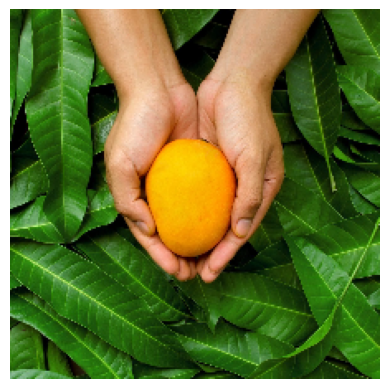

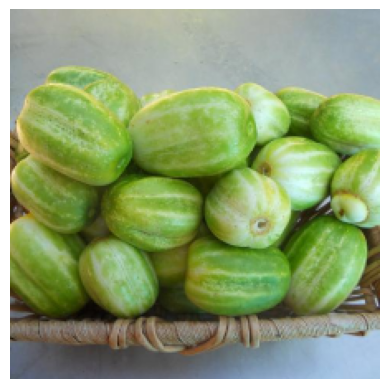

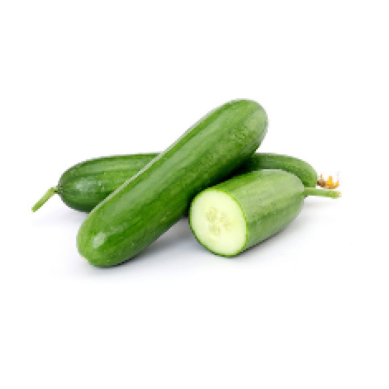

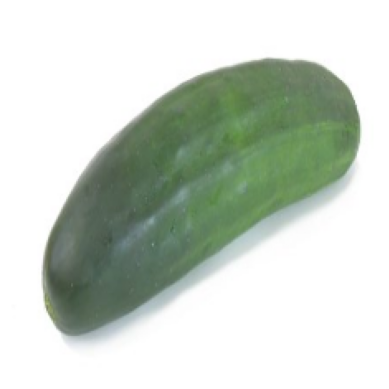

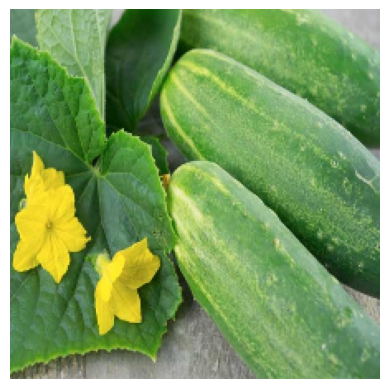

In [48]:
for i in range(5):
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.show()

CNN model

In [49]:
model = Sequential()

#Input layer
model.add(Input(shape=(32,32,3)))

#First Block
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))
model.add(Conv2D(filters= 64,
                 kernel_size = (3,3),
                 activation = 'relu',
                 padding = 'same'))

model.add(MaxPooling2D(pool_size=(4,4)))

#SecondBlock
model.add(Conv2D(256,(3,3), activation = 'relu',strides =(2,2)))
model.add(Conv2D(256,(3,3), activation = 'relu',padding ='same'))
model.add(MaxPooling2D(pool_size=(3,3)))



#FNN
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [50]:
model.compile(loss = 'binary_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [51]:
history = model.fit(x_train_32,y_train,
                    epochs = 30,
                    validation_data=(x_val_32,y_val))

Epoch 1/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 28s 288ms/step - accuracy: 0.9996 - loss: 0.1785 - val_accuracy: 0.7164 - val_loss: 3.6309
Epoch 2/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 24s 344ms/step - accuracy: 0.9998 - loss: 0.0040 - val_accuracy: 0.7164 - val_loss: 2.3872
Epoch 3/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 21s 298ms/step - accuracy: 0.9988 - loss: 0.0097 - val_accuracy: 0.7164 - val_loss: 6.8653
Epoch 4/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 40s 289ms/step - accuracy: 0.9999 - loss: 0.0023 - val_accuracy: 0.7164 - val_loss: 2.1115
Epoch 5/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 22s 317ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.7164 - val_loss: 1.5225
Epoch 6/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.9999 - loss: 0.0047 - val_accuracy: 0.7164 - val_loss: 1.3145
Epoch 7/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - accuracy: 0.9983 - loss: 0.0100 - val_accuracy: 0.7164 - val_loss: 9.0666
Epoch 8/30
69/69 ━━━━━━━━━━━━━━━━━━━━ 41s 324ms/step - accuracy: 0.9999 - loss: 0.0024 - val_accu

In [53]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 256)           │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 3, 3, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,527,685 (9.64 MB)

 Trainable params: 842,561 (3.21 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,685,124 (6.43 MB)